In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
path = 'drive/MyDrive/Shared Drive/Data/'
playlists = pd.read_csv(path + 'playlists.csv')
print(playlists.shape)
playlists

(100001, 11)


,pid,name,duration_ms,num_tracks,num_artists,num_albums,num_followers,num_edits,description,collaborative,modified_at
0,0,Throwbacks,11532414,52,37,47,1,6,NaN,False,1493424000
1,1,disney,31428282,189,65,16,1,4,NaN,False,1457827200
2,2,Indie Electro,38241566,165,8,18,2,2,NaN,False,1417824000
3,3,jack & jack,3549358,17,3,14,1,3,NaN,False,1465430400
4,4,vibes,51242585,225,157,195,2,91,NaN,False,1498435200
...,...,...,...,...,...,...,...,...,...,...,...
99996,99996,EdM,30149399,135,87,124,2,75,NaN,False,1509408000
99997,99997,EME,71434251,210,12,31,3,17,NaN,False,1505520000
99998,99998,run!,13524857,46,31,40,1,11,NaN,False,1428796800
99999,99999,driving,3875542,15,15,15,1,6,NaN,False,1453680000


In [4]:
path = 'drive/MyDrive/Shared Drive/Data/'
songs = pd.read_csv(path + 'songs.csv')
print(songs.shape)
songs

(6679099, 8)


,pid,playlist_pos,track_name,artist_name,album_name,track_uri,artist_uri,album_uri
0,0,0,Lose Control (feat. Ciara & Fat Man Scoop),Missy Elliott,The Cookbook,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,spotify:album:6vV5UrXcfyQD1wu4Qo2I9K
1,0,1,Toxic,Britney Spears,In The Zone,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,spotify:album:0z7pVBGOD7HCIB7S8eLkLI
2,0,2,Crazy In Love,Beyoncé,Dangerously In Love (Alben für die Ewigkeit),spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,spotify:album:25hVFAxTlDvXbx2X2QkUkE
3,0,3,Rock Your Body,Justin Timberlake,Justified,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,spotify:album:6QPkyl04rXwTGlGlcYaRoW
4,0,4,It Wasn't Me,Shaggy,Hot Shot,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,spotify:album:6NmFmPX56pcLBOFMhIiKvF
...,...,...,...,...,...,...,...,...
6679094,100000,88,I Feel It Coming,The Weeknd,Starboy,spotify:track:5GXAXm5YOmYT0kL5jHvYBt,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,spotify:album:4AdZV63ycxFLF6Hcol0QnB
6679095,100000,89,Party Monster,The Weeknd,Starboy,spotify:track:4F7A0DXBrmUAkp32uenhZt,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,spotify:album:2ODvWsOgouMbaA5xf0RkJe
6679096,100000,90,Attention,Charlie Puth,Attention,spotify:track:4iLqG9SeJSnt0cSPICSjxv,spotify:artist:6VuMaDnrHyPL1p4EHjYLi7,spotify:album:0t0NkQulrNkxw2oUZZHboA
6679097,100000,91,Without Me,Fantasia,Side Effects Of You (Deluxe Version),spotify:track:2p88qjsUqXPZnuPh5lmBEV,spotify:artist:7xAcVHPiirnUqfdqo0USb1,spotify:album:7dbS6arvfa5lkzer8I6tq2


In [5]:
print(f"{songs.pid.nunique()} playlists in dataset")

100001 playlists in dataset


In [6]:
list(playlists.columns), list(songs.columns)

(['pid',
  'name',
  'duration_ms',
  'num_tracks',
  'num_artists',
  'num_albums',
  'num_followers',
  'num_edits',
  'description',
  'collaborative',
  'modified_at'],
 ['pid',
  'playlist_pos',
  'track_name',
  'artist_name',
  'album_name',
  'track_uri',
  'artist_uri',
  'album_uri'])

In [7]:
print(f"Approximately {songs.shape[0] / playlists.shape[0]:.1f} songs per playlist") # mean playlist length
print(f"Longest playlist: {playlists.num_tracks.max()} songs") # longest playlist
print(f"Longest playlist: {playlists.num_tracks.min()} songs") # shortest playlist

Approximately 66.8 songs per playlist
Longest playlist: 250 songs
Longest playlist: 5 songs


### Important Considerations

#### Overall demographics of users contributing to the MPD

##### Gender
 * Male: 45%
 * Female: 54%
 * Unspecified: 0.5%
 * Nonbinary: 0.5%

##### Age
 * 13-17:  10%
 * 18-24:  43%
 * 25-34:  31%
 * 35-44:   9%
 * 45-54:   4%
 * 55+:     3%

##### Country
 * US: 100%
 
#### Time Created

- ##### "These playlists were created during the period of January 2010 through October 2017."

### Helpful Functions & Dicts

In [8]:
def get_playlist_info(pid):
    return playlists.loc(pid)

def get_playlist(pid):
    return songs[songs['pid'] == pid]

# Dict #1: {pid: playlist_name}
pid_name_df = playlists[['pid', 'name']]
pid_to_name = {pid_name_df['pid'][i]: pid_name_df['name'][i] for i in range(pid_name_df.shape[0])}
del pid_name_df # remove from memory

# Dict #2: {pid: playlist_followers}
pid_followers_df = playlists[['pid', 'num_followers']]
pid_to_followers = {pid_followers_df['pid'][i]: pid_followers_df['num_followers'][i] for i in range(pid_followers_df.shape[0])}
del pid_followers_df # remove from memory

### EDA - Feature Analysis

In [9]:
# separate features for EDA

# (1) Playlists DataFrame
text_p = ['name', 'description']
temporal_p = ['modified_at'] # in 'seconds since last epoch' (playlists created btw 2010 and 2017)
num_dis_p = ['pid', 'num_edits', 'num_artists', 'num_tracks', 'num_albums', 'num_followers']
num_cont_p = ['duration_ms']
cat_nom_p = ['collaborative']

# (2) Songs DataFrame
test_s = ['track_name', 'artist_name', 'album_name']
num_dis_s = ['pid', 'playlist_pos']
spotify_codes = ['track_uri', 'artist_uri', 'album_uri']

#### Playlist 'Last Modification' Date

In [10]:
playlists.modified_at.min(), playlists.modified_at.max() # not quite sure what to do with this feature

(1280275200, 1509494400)

This feature describes the seconds since the last modification of the playlist. Because each measurement of seconds is rounded up to midnight of that day, we can convert seconds to days.

_*It's helpful to consider once again that all playlists in the dataset were created between 2010 to 2017._

In [11]:
playlists.modified_at / (60 * 60 * 24) # / [(sec/min) x (min/hour) x (hour/day)]

0         17285.0
1         16873.0
2         16410.0
3         16961.0
4         17343.0
           ...   
99996     17470.0
99997     17425.0
99998     16537.0
99999     16825.0
100000    17422.0
Name: modified_at, Length: 100001, dtype: float64

<font color='red'> This is only so helpful, for its hard to determine from the documentation the date from which these values began counting 😕 </font>

#### Playlist Descriptions

In [12]:
print(f"{100001 - playlists.description.isnull().sum()} non-null playlist descriptions")

1837 non-null playlist descriptions


In [13]:
print(f"{playlists.description.nunique() - 1} unique descriptions")

1824 unique descriptions


In [14]:
# example of 10 playlist descriptions
list(playlists.description.unique()[1:11])

['Strictly songs that ride.',
 'Strong Females and Songs You Can Sing Along To',
 'RAP HAPPY RATCHET',
 'winter things',
 'songs 2 use for future gopro videos',
 'SPOOKY SONGS FOR HALLOWEEN !!!!!',
 ':(',
 'The hip-hop and rap songs I&#x27;m enjoying most currently. Rarely above 60 songs.',
 'inspiration to film',
 'Only the dankest of jams.']

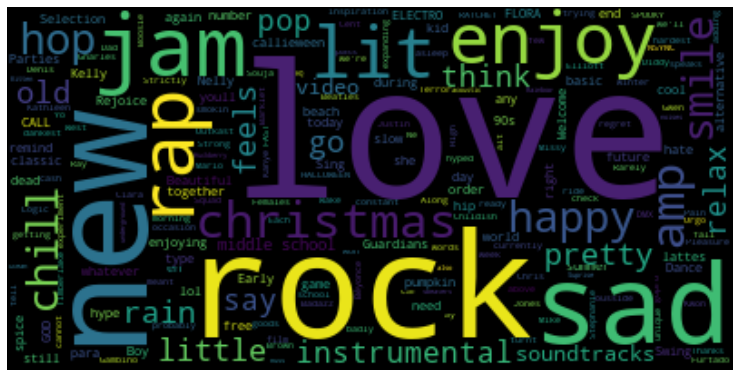

In [15]:
# Print Wordcloud of most popular terms among (non-null) Playlist Descriptions

stop_words = ['as', 'the', 'and', 'that', 'our', 'my', 'they', 'in', 'on', 'of', 'that', 'this', 'or', 'are',
              'be', 'from', 'for', 'but', 'not', 'so', 'no', 'we', 'us', 'your', 'you', 'playlist', 'my', 'everything',
              'music', 'it', 'all', 'is', 'some', 'when', 'me', 'like', 'these', 'have', 'will', 'about', 'song', 'most',
              'to', 'get', 'with', 'out', 'at', 're', 'by', 'don', 'if', 'can', 'its', 'only', 'an', 'while', 'im',
              'dont', 'here', 'just', 'stuff', 've', 'quot', 'up', 'one', 'really', 'll', 'made', 'too', 'down', 'best',
              'listen', 'feel', 'songs', 'x27', 'x2f', 'a', 's', 'good', 'collection', 'year', 'what', 'vibe', 'great',
              'tune', 'I', 't', 'know', 'mix', 'u', 'want', 'keep', 'got', 'tunes', 'every', 'vibes', 'mostly', 'favorites',
              'listening', 'there', 'those', 'ever', 'm', 'favorite', 'who', 'time', 'something', 'has', 'D', 'more'
              'feeling', 'other', 'artist', 'life', 'mood', 'was', 'lt', 'R', 'lot', 'around', 'because', 'never', 'then',
              'than', 'track', 'listened', 'into', 'do', 'e', 'beat', 'them', 'way', 'through', 'self', 'take', 'more',
              'could', 'feelin', 'B', 'sound', 'thing', 'top', 'where', 'always', 'am', 'make', 'feeling', 'use',
              'he', 'how', 'P', 'things', 'wanted', 'fav', 'everyone']

# Wordcloud of tokens
# Create and generate a word cloud image:
unique_desc = playlists.description.unique()
tokens_wc = WordCloud(stopwords=stop_words).generate(' '.join(list(unique_desc[1:200])))

# Display the generated image:
plt.figure(figsize=(13,7))
plt.imshow(tokens_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
# # stop_words = []
# desc_tokens = nltk.word_tokenize(unique_desc[1])
# cv = CountVectorizer(stop_words=stop_words, ngram_range=(1, 3))
# count_arr = cv.fit_transform(list(unique_desc[1:])).toarray()
# tokens = cv.get_feature_names_out()
# count_df = pd.DataFrame(data=count_arr, columns=tokens)
# # list(count_df.sum().sort_values(ascending=False).index[:100])

Above we can see a word cloud of tokens found in the descriptions of many of the playlists (only 1823 playlists out of the total 100000 playlists are accompanies by a description) with certain words removed that I felt didn't carry as much meaning as those that appear above.

We can see lots of really notable token words used to describe some of these playlists, such as:
 - love
 - rock
 - christmas
 - happy
 - new
 - lit
 - jam
 - sad
 - instrumental
 - happy
 - smile
 - soundtrack
 - rejoice
 - rain
 - 90s
 
From these examples alone, we can see that there are many ways to describe a playlist mood (emotion, genre, type of sound, vibe, era, weather, etc.). This is important to understand as we look to develop our playlist generator.

#### Playlist Names

Check lengths of playlist names, create horiz. bar chart to visualize (discrete numerical feature):



Mean playlist name length: 1.42 words
Min playlist name length: 1 words
Max playlist name length: 12 words


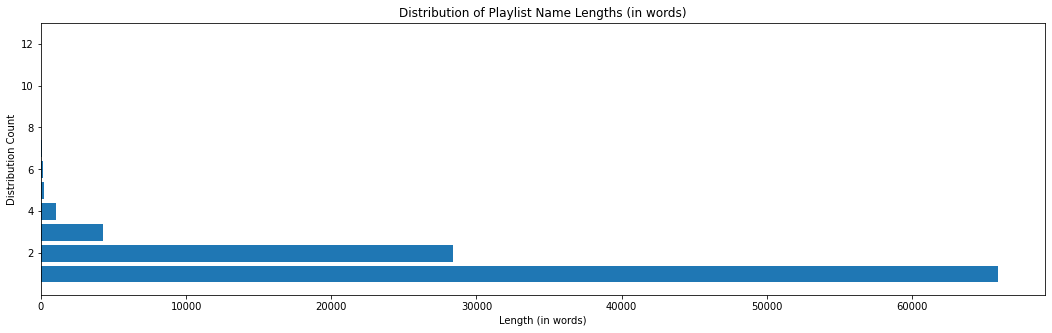

1     65898
2     28378
3      4249
4      1013
5       225
6       123
7        49
8        25
9        22
11        9
10        7
12        1
Name: Len. Playlist Names, dtype: int64

In [17]:
playlist_name_lengths = pd.Series([len(name.split()) for name in list(playlists.name) if name is not np.nan], name='Len. Playlist Names')
pnlvc = playlist_name_lengths.value_counts()
print(f"Mean playlist name length: {playlist_name_lengths.mean():.2f} words")
print(f"Min playlist name length: {playlist_name_lengths.min()} words")
print(f"Max playlist name length: {playlist_name_lengths.max()} words")

plt.figure(figsize=(18,5))
plt.barh(y=pnlvc.index, width=pnlvc.values)
plt.title('Distribution of Playlist Name Lengths (in words)')
plt.ylabel('Distribution Count')
plt.xlabel('Length (in words)')
plt.show()

# Print value counts to see values that are too small to see in the chart below
pnlvc

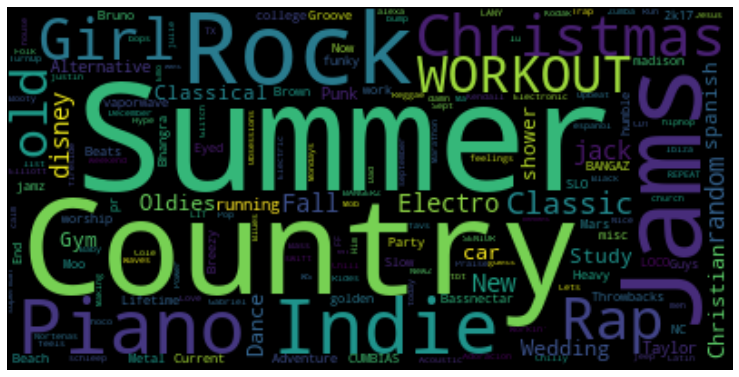

In [18]:
# tokenize playlist names

stop_words = ['as', 'the', 'and', 'that', 'our', 'my', 'they', 'in', 'on', 'of', 'that', 'this', 'or', 'are',
              'be', 'from', 'for', 'but', 'not', 'so', 'no', 'we', 'us', 'your', 'you', 'playlist', 'my', 'everything',
              'music', 'it', 'all', 'is', 'some', 'when', 'me', 'like', 'these', 'have', 'will', 'about', 'song', 'most',
              'to', 'get', 'with', 'out', 'at', 're', 'by', 'don', 'if', 'can', 'its', 'only', 'an', 'while', 'im',
              'dont', 'here', 'just', 'stuff', 've', 'quot', 'up', 'one', 'really', 'll', 'made', 'too', 'down', 'best',
              'listen', 'feel', 'songs', 'x27', 'x2f', 'a', 's', 'good', 'collection', 'year', 'what', 'vibe', 'great',
              'tune', 'I', 't', 'know', 'mix', 'u', 'want', 'keep', 'got', 'tunes', 'every', 'vibes', 'mostly', 'favorites',
              'listening', 'there', 'those', 'ever', 'm', 'favorite', 'who', 'time', 'something', 'has', 'D', 'more'
              'feeling', 'other', 'artist', 'life', 'mood', 'was', 'lt', 'R', 'lot', 'around', 'because', 'never', 'then',
              'than', 'track', 'listened', 'into', 'do', 'e', 'beat', 'them', 'way', 'through', 'self', 'take', 'more',
              'could', 'feelin', 'B', 'sound', 'thing', 'top', 'where', 'always', 'am', 'make', 'feeling', 'use',
              'he', 'how', 'P', 'things', 'wanted', 'fav', 'everyone']

# Wordcloud of tokens
# Create and generate a word cloud image:
unique_playlist_names = playlists.name.unique()
tokens_wc = WordCloud(stopwords=stop_words).generate(' '.join(list(unique_playlist_names[:200])))

# Display the generated image:
plt.figure(figsize=(13,7))
plt.imshow(tokens_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Above we can see a word cloud of the top 200 tokens that appeared in all playlist names in the dataset, in which we can find:

- Genres
    - Rock
    - Classic (Rock)
    - Rap
    - Indie
    - Country
    - Rock
    - Pop
    - Alternative
    - Classical
    - Soundtracks
- Types of Sound
    - Piano
    - Acoustic
    - Electro
    - Jamz (rhythmic, upbeat)
    - SLO, Slow (slow)
    - Bangaz (energetic, upbeat)
    - Groove (smooth)
- Activities/Events
    - Shower
    - Wedding
    - Party
    - Running
    - Workout
    - Gym
    - Beach
    - Driving (Jeep, Car)
    - Study
    - Adventure
- Time/Season/Era
    - 2k17
    - Weekend
    - December
    - Old
    - New
    - Throwbacks
- Artists
    - Justin (Bieber, Timberlake)
    - Kodak (Black)
    - Bruno, Mars (Bruno Mars)
    - Jack (Harlow)
    - Eyed (Black Eyed Peas)
    - Cole (J. Cole)
- Religious/Cultural
    - Christmas
    - Black
    - Worship
- Languages
    - Spanish
- Other
    - Random
    - Disney

Perhaps even moreso with the palylist namse than with the playlist descriptions, we can see that there are many ways to describe a playlist mood. Again, this is important to understand as we look to develop our playlist generator, we will have to reverse engineer this relationship, **generating playlists that accurately reflect how different words and phrases (activities, events, genres, sounds, times, artists, etc.) impact the mood of a playlist**

#### Artist Names

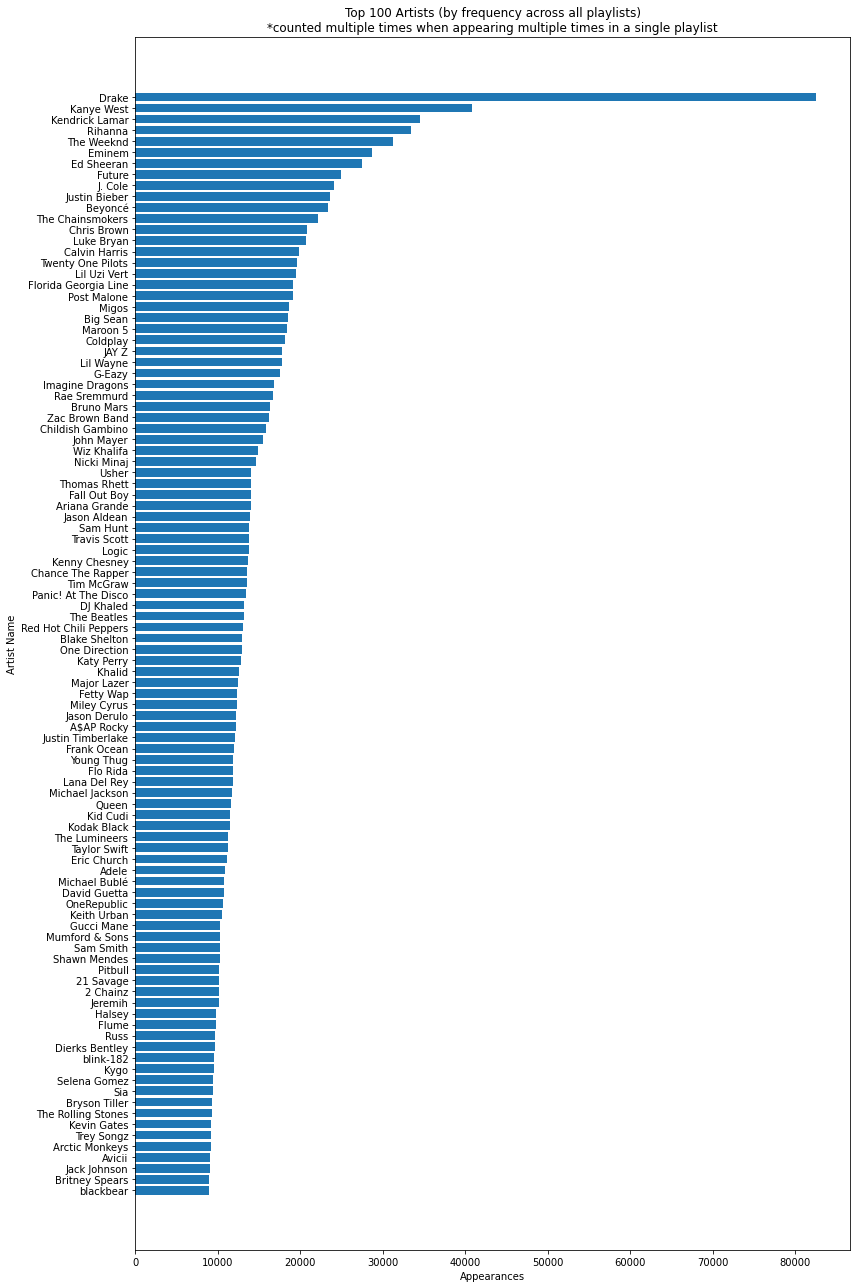

In [19]:
# Most Frequent Artists
most_freq_artists = songs.artist_name.value_counts()
top_100 = most_freq_artists[:100][::-1]

# Plot Top 100 
plt.figure(figsize=(12, 18))
plt.barh(y=top_100.index, width=top_100.values)
plt.title('Top 100 Artists (by frequency across all playlists)\n*counted multiple times when appearing multiple times in a single playlist')
plt.xlabel('Appearances')
plt.ylabel('Artist Name')
plt.tight_layout()
plt.show()

Above we can see the top 100 artists. Some insights:

- People love Drake
- R&B, Rap, and Pop are king
- Country looks like a close fourth (Florida georgia Line, Thomas Rhett, Zac Brown Band)
- Alternative/Indie is very much alive (Red Hot Chili Peppers, Twenty One Pilots, Fall Out Boy, Blink-182, Imagine Dragons, etc.)
- People still listen to the Beatles, Queen, and the Rolling Stones

#### Song Names

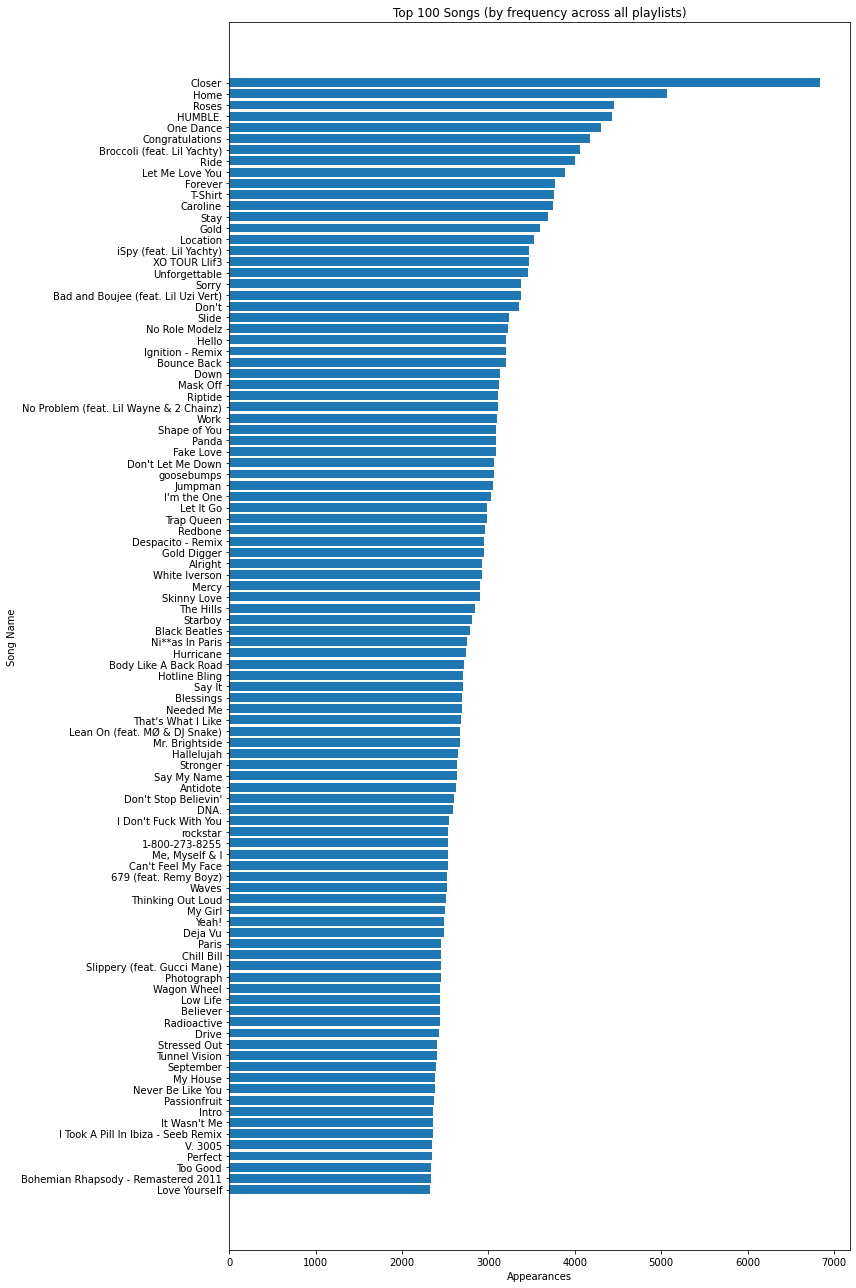

In [20]:
# Most Frequent Songs
most_freq_songs = songs.track_name.value_counts()
top_100 = most_freq_songs[:100][::-1]

# Plot Top 100 
plt.figure(figsize=(12, 18))
plt.barh(y=top_100.index, width=top_100.values)
plt.title('Top 100 Songs (by frequency across all playlists)')
plt.xlabel('Appearances')
plt.ylabel('Song Name')
plt.tight_layout()
plt.show()

Some insights:

- Most popular song among all playlists: Closer by The Chainsmokers
- R. Kelly's scandal seemed to have no impact on the popularity of his Ignition (Remix)
- Once again we can see that Rap and Pop are king

#### Album Names

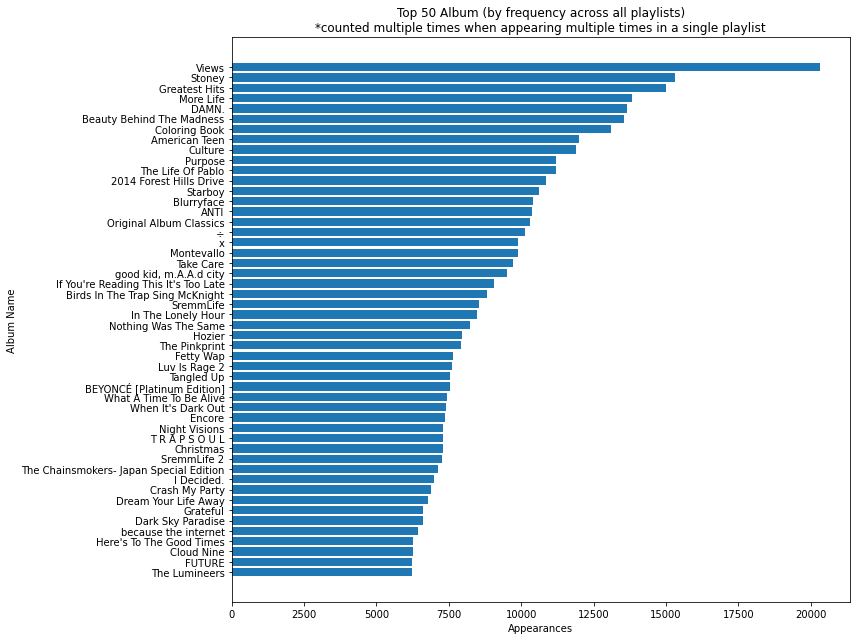

In [21]:
# Most Frequent Albums
most_freq_albums = songs.album_name.value_counts()
top_50 = most_freq_albums[:50][::-1]

# Plot Top 50
plt.figure(figsize=(12, 9))
plt.barh(y=top_50.index, width=top_50.values)
plt.title('Top 50 Album (by frequency across all playlists)\n*counted multiple times when appearing multiple times in a single playlist')
plt.xlabel('Appearances')
plt.ylabel('Album Name')
plt.tight_layout()
plt.show()

Some insights:
- Once, again, Rap/Hip-Hop, Pop, and R&B are king
    - Views (Drake, Rap/Hip-Hop)
    - Stoney (Post Malone, Pop/Hip-Hop)
    - Greatest Hits (would have to go into data to find artist, could be referring to multiple artists)
    - More Life (Drake, Rap/Hip-Hop)
    - DAMN (Kendrick Lamar, Rap/Hip-Hop)
    - American Teen (Khalid, Pop/R&B)
    - Culture (Migos, Rap/Hip-Hop)
    - Purpose (Justin Bieber, Pop)
    - The Life of Pablo (Kanye West, Rap/Hip-Hop)
    
- Once again, people love Drake (Views - Drake is number one album by a large margin)
- Post Malone's Stoney, the 2nd most popular album across all playlists, was interestingly one of his first albums

#### Playlist Duration (Time to Listen Through)

In [22]:
print(f"Mean playlist duration: {playlists.duration_ms.mean() / (1000 * 60 * 60)} hours")
print(f"Std playlist duration: {playlists.duration_ms.std() / (1000 * 60 * 60)} hours")
print(f"Min playlist duration: {playlists.duration_ms.min() / (1000 * 60)} minutes")
print(f"Max playlist duration: {playlists.duration_ms.max() / (1000 * 60 * 60)} hours")

Mean playlist duration: 4.351071935438979 hours
Std playlist duration: 3.585344946063689 hours
Min playlist duration: 9.5181 minutes
Max playlist duration: 91.11649944444444 hours


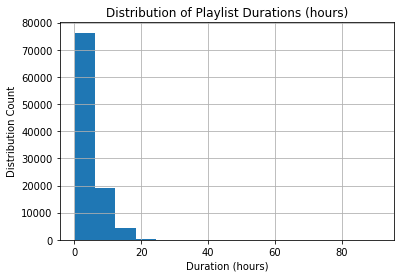

In [23]:
(playlists.duration_ms / (1000 * 60 * 60)).hist(bins=15)
plt.title('Distribution of Playlist Durations (hours)')
plt.xlabel('Duration (hours)')
plt.ylabel('Distribution Count')
plt.show()

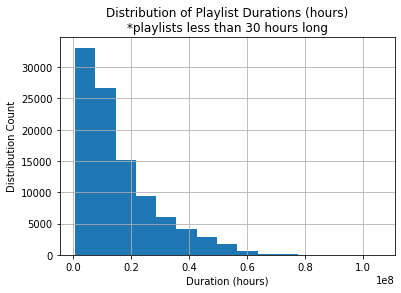

In [24]:
# Filtered: Playlists with a duration less than 30 hours
duration_less_30_hrs = playlists['duration_ms'][playlists.duration_ms < 30 * 1000 * 60 * 60]
duration_less_30_hrs.hist(bins=15)
plt.title('Distribution of Playlist Durations (hours)\n*playlists less than 30 hours long')
plt.xlabel('Duration (hours)')
plt.ylabel('Distribution Count')
plt.show()

#### Followers of Playlist & Some Features Filtered by Most Followed

In [25]:
print(f"Mean playlist followers: {playlists.num_followers.mean()} followers")
print(f"Std playlist followers: {playlists.num_followers.std()} followers")
print(f"Min playlist followers: {playlists.num_followers.min()} follower")
print(f"Max playlist followers: {playlists.num_followers.max()} followers")

Mean playlist followers: 2.5006549934500657 followers
Std playlist followers: 82.59797541141184 followers
Min playlist followers: 1 follower
Max playlist followers: 15842 followers


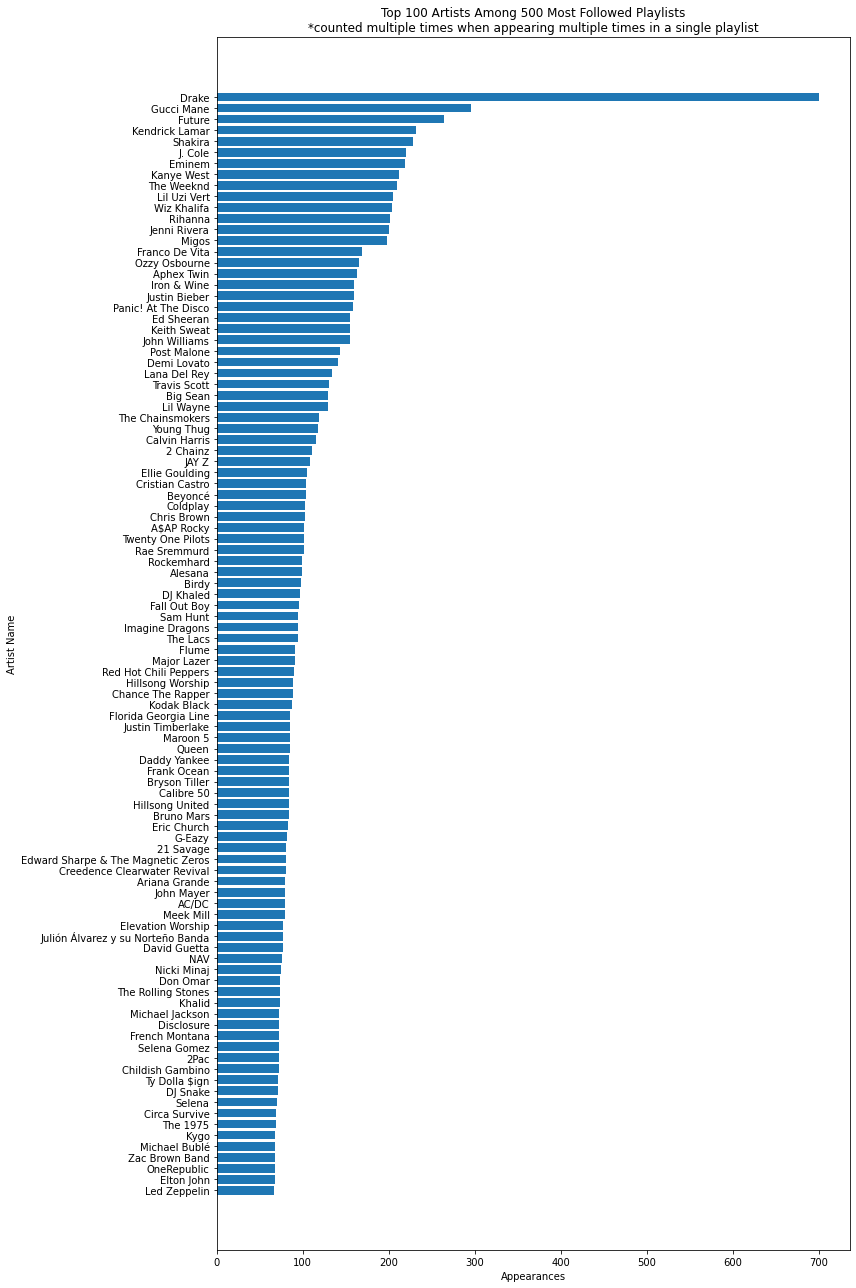

In [26]:
# (a) 100 Most Frequent artists among 500 MOST FOLLOWED playlists

# Get pid's of 500 MOST FOLLOWED Playlists
top_500_pid = playlists.sort_values('num_followers', ascending=False)['pid'][:500].values

# Extract df of songs in each playlist in above list of pid's (top_500_pid)
top_500_playlists = pd.concat([get_playlist(pid) for pid in top_500_pid], axis=0)

# Plot 100 most frequent artists among 500 most followed playlists
top100 = top_500_playlists.artist_name.value_counts()[:100][::-1]
plt.figure(figsize=(12, 18))
plt.barh(y=top100.index, width=top100.values)
plt.title('Top 100 Artists Among 500 Most Followed Playlists\n*counted multiple times when appearing multiple times in a single playlist')
plt.xlabel('Appearances')
plt.ylabel('Artist Name')
plt.tight_layout()
plt.show()

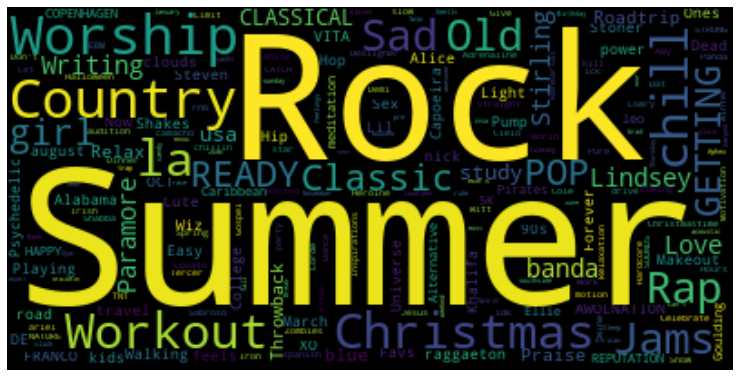

In [27]:
# (b) 200 Most frequent terms that appear among 500 MOST FOLLOWED playlists

# Get info for 500 MOST FOLLOWED Playlists
top_500_playlists = playlists.sort_values('num_followers', ascending=False).iloc[:500, :]

# Extract top 200 terms found in 500 most followed playlists
tokens_wc = WordCloud(stopwords=stop_words).generate(' '.join(list(top_500_playlists.name.unique()[:200])))

# Display the generated image:
plt.figure(figsize=(13,7))
plt.imshow(tokens_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
import seaborn as sns

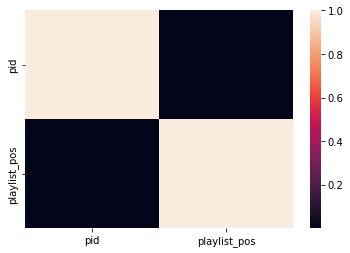

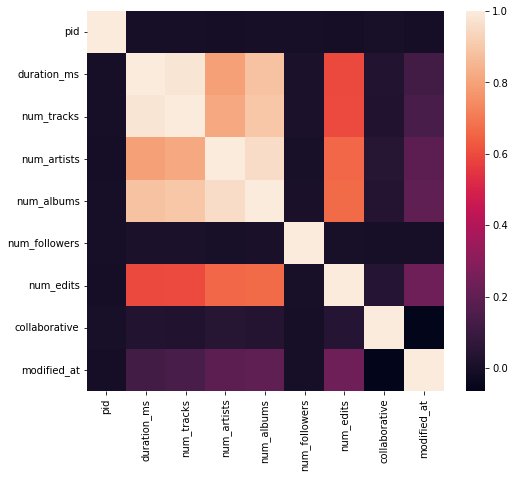

In [29]:
sns.heatmap(songs.corr())
plt.show()

plt.figure(figsize=(8,7))
sns.heatmap(playlists.corr())
plt.show()

- Most high correlations are rather meaningless, for they are completely intuitive (e.g. `duration_ms` and `num_tracks`)
- Somehwat interesting insight: the more times a playlist is edited (`num_edits`), the longer it typically is (`duration_ms`). Somewhat intuitive, but not necessarily obvious.
- No features highly correlated with `num_followers`, which is the only logical feature that could be considered as a target feature in experimenting with a linear regression or other kind of supervised learning model.

#### Other Features

In [30]:
playlists.collaborative.value_counts(normalize=True)

False    0.97762
True     0.02238
Name: collaborative, dtype: float64

Only 2.2% of playlists are collaborative, the rest are not.

## Actionable Insights
What to do with the above insights:

* Consider dropping the `modified_at` column in the `playlists` DataFrame
  - "seconds since last epoch" - don't know at what point the dataset author began counting
  - not sure how it would be relevant to the model even if we did know 
* Consider dropping the `description` column in the `playlists` DataFrame
  - Too many null descriptions; of 100,000 playlists, we have only 1837 non-null playlist descriptions and only 1823 unique descriptions.

## Pre-processing Summary

#### What We've Done

* Converted JSON data of 100,000 playlists to two foundational dataframes, containing data on 100,000 playlists and their songs


#### What We'll Need To Do (as we move to a more advanced model)

* Scaling
* Feature Engineering
 - May want to add a `genre` column to `songs` DataFrame
 - May want to add category tags according to the insights we found in the EDA of Playlist Names (e.g. add one-hot encoded columns to `playlists` df for Genre, Artist, Activity/Event, etc. to indicate whether the playlist title contains text belonging to each category 


